In [6]:
# dataset
import os
import torch

from starry.utils.config import Configuration
from starry.utils.dataset_factory import loadDataset


torch.set_printoptions(profile="full")

DATA_DIR = os.getenv('DATA_DIR')

config = Configuration.create('configs/paraff-data-test.yaml', volatile=True)
data, = loadDataset(config, data_dir=DATA_DIR, splits='*0/1')

it = iter(data)
next(it)


drop_p: tensor([[0.5845],
        [0.6032],
        [0.3911],
        [0.5449],
        [0.4422],
        [0.4642],
        [0.4532],
        [0.3006],
        [0.5949],
        [0.5057],
        [0.3251],
        [0.5219],
        [0.4456],
        [0.3371],
        [0.2936],
        [0.2111],
        [0.6524],
        [0.3866],
        [0.3710],
        [0.4331],
        [0.2255],
        [0.3364],
        [0.4293],
        [0.2937],
        [0.4582],
        [0.4872],
        [0.3359],
        [0.5044],
        [0.4586],
        [0.3740],
        [0.3460],
        [0.5889],
        [0.1687],
        [0.3193],
        [0.3052],
        [0.3688],
        [0.4034],
        [0.4662],
        [0.4869],
        [0.4279],
        [0.3953],
        [0.3153],
        [0.5997],
        [0.3131],
        [0.3117],
        [0.3300],
        [0.4402],
        [0.3986],
        [0.2493],
        [0.3313],
        [0.5602],
        [0.2869],
        [0.4454],
        [0.4817],
        [0.4348],
  

{'input_ids': tensor([[82, 85, 83, 87,  1, 11, 26, 36,  4,  7, 51, 39, 49, 55, 68, 39, 56, 68,
          39, 57, 68, 66, 42, 50, 57,  3,  5,  8, 51, 67, 42, 50, 39, 49, 41, 42,
          55, 63, 42, 39, 49, 56,  3,  6,  8, 51, 66, 44, 45, 50, 50, 44, 45, 49,
          55, 63, 44, 45, 49, 56,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
   

In [20]:
# embeding & linear
import torch.nn as nn
import torch


embed = nn.Embedding(10, 17)
linear = nn.Linear(17, 10)

print(embed.weight.shape, linear.weight.shape)


linear.weight = embed.weight
t1 = (torch.rand(1, 10) * 10).long()
t2 = linear(embed(t1)).argmax(axis=-1)

t1, t2


torch.Size([10, 17]) torch.Size([10, 17])


(tensor([[9, 6, 0, 2, 8, 8, 7, 1, 2, 9]]),
 tensor([[9, 6, 0, 2, 8, 8, 7, 1, 2, 9]]))

In [2]:
# model
import os

from starry.utils.config import Configuration
from starry.utils.dataset_factory import loadDataset
from starry.utils.model_factory import loadModel


DATA_DIR = os.getenv('DATA_DIR')

config = Configuration.create('configs/paraff-test.yaml', volatile=True)
train, val = loadDataset(config, data_dir=DATA_DIR, device='cpu')
model = loadModel(config['model'], postfix='Loss')

it = iter(train)

batch = next(it)
loss, metric = model(batch)

loss, metric


(tensor(4.8215, grad_fn=<NllLossBackward0>), {'acc': 0.0})

In [40]:
import torch


#s = torch.ones(5, 5)
#s[:3, :3] = 0
#torch.triu(s, diagonal=1)


entries = torch.tensor([[1,2,3,0,5,6,7], [1,2,0,4,5,6,7]])

mask = (entries == 0).float()
mask = mask.matmul(torch.triu(torch.ones(7, 7), diagonal=0))
random = torch.rand_like(mask) < 0.4

#(mask, random, (1 - mask) * random)

drops = (1 - mask) * random
print(drops)

indices = torch.arange(7)[None, :].repeat(2, 1) + drops.matmul(torch.triu(torch.ones(7, 7), diagonal=0))
indices = indices.clip(max=6)
indices

tensor([[0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.]])


tensor([[0., 1., 3., 4., 5., 6., 6.],
        [1., 2., 3., 4., 5., 6., 6.]])

In [6]:
import torch


t = torch.arange(10)
idx = torch.randperm(4)

t[:4] = t[idx]

t

tensor([3, 2, 1, 0, 4, 5, 6, 7, 8, 9])

In [12]:
n = torch.rand(3, 3)

n, n.sum(dim=1).tolist()

(tensor([[0.3009, 0.2891, 0.0385],
         [0.8578, 0.6066, 0.6637],
         [0.2743, 0.0362, 0.8282]]),
 [0.6284621357917786, 2.1280457973480225, 1.13874351978302])

In [2]:
# paraff VAE
import os

from starry.utils.config import Configuration
from starry.utils.dataset_factory import loadDataset
from starry.utils.model_factory import loadModel


DATA_DIR = os.getenv('DATA_DIR')

config = Configuration.create('configs/paraff-vae-test.yaml', volatile=True)
train, val = loadDataset(config, data_dir=DATA_DIR, device='cpu')
model = loadModel(config['model'], postfix='Loss')

it = iter(train)

batch = next(it)
loss, metric = model(batch)

loss, metric


/home/xunan/work/deep-starry-paraff/env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(tensor(4.6920, grad_fn=<AddBackward0>),
 {'acc': 0.009345794096589088,
  'recons_loss': 4.691957473754883,
  'kld_loss': 0.0})

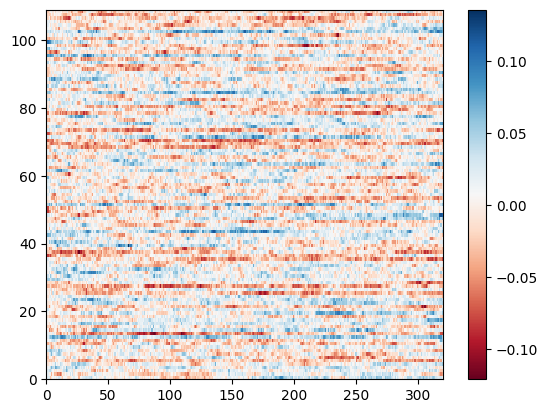

In [7]:
import matplotlib.pyplot as plt


inspection = model.inspectRun(batch)
#inspection

plt.pcolormesh(inspection['pred'][0].transpose(0, 1).detach().numpy(), cmap='RdBu')
plt.colorbar()
plt.show()
